In [1]:
import pandas as pd
import sqlite3

In [2]:
orders = pd.read_csv(r"C:\Users\shivaprasad\Downloads\orders.csv")
orders

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


In [3]:
users = pd.read_json(r"C:\Users\shivaprasad\Downloads\users.json")
users

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


In [4]:
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [9]:
with open(r"C:\Users\shivaprasad\Downloads\restaurants.sql", "r") as file:
    sql_script = file.read()

conn.executescript(sql_script)

In [10]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [11]:
#Merge Orders + Users
orders_users = orders.merge(
    users,
    on="user_id",
    how="left"
)

In [13]:
#Merge With Restaurants
final_data = orders_users.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)

In [14]:
#check final data
final_data.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [15]:
final_data.shape

(10000, 12)

In [16]:
final_data.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [17]:
final_data.to_csv("final_food_delivery_dataset.csv", index=False)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\shivaprasad\Documents\final_food_delivery_dataset.csv")
df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


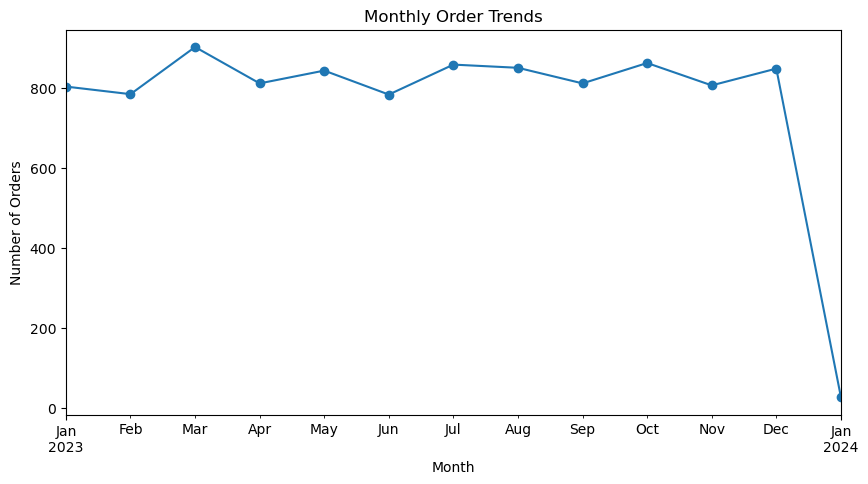

In [26]:
#Order trends over time
orders_over_time = df.groupby(df['order_date'].dt.to_period('M')).size()
orders_over_time.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

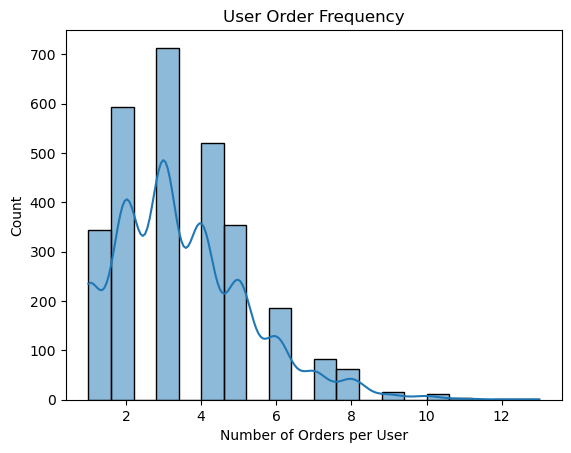

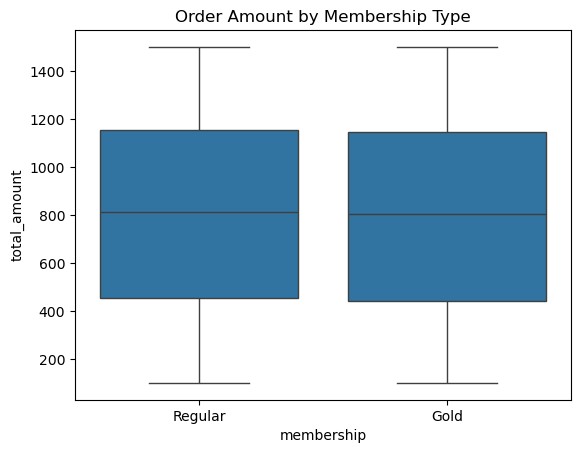

In [37]:
#User Behavior Patterns
user_orders = df.groupby('user_id')['order_id'].count()
sns.histplot(user_orders, bins=20, kde=True)
plt.title('User Order Frequency')
plt.xlabel('Number of Orders per User')
plt.show()

sns.boxplot(x='membership', y='total_amount', data=df)
plt.title('Order Amount by Membership Type')
plt.show()

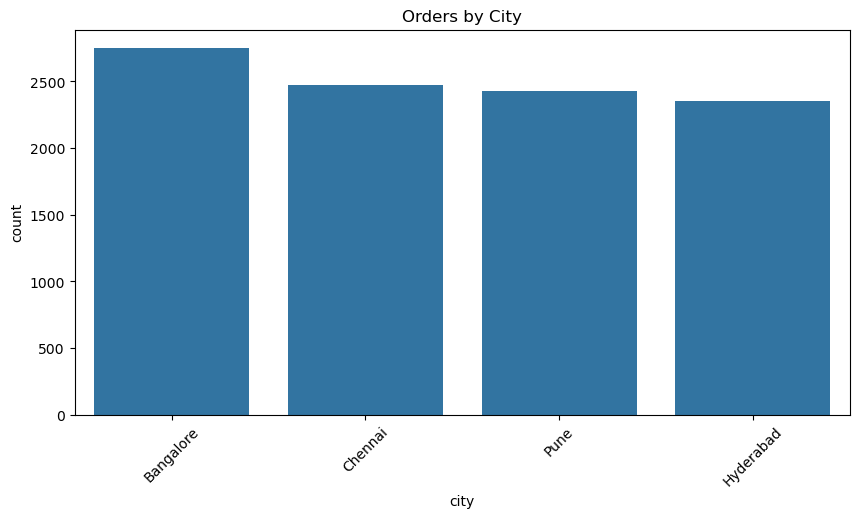

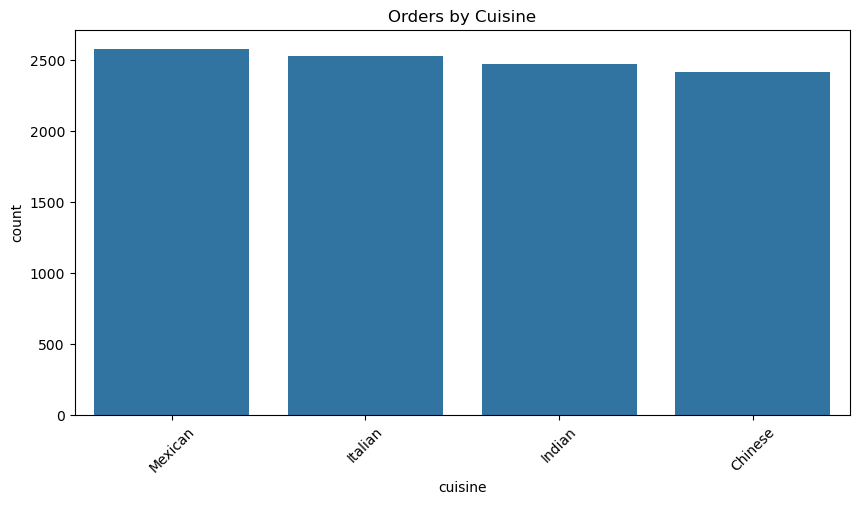

In [28]:
#City-wise and Cuisine-wise Performance
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index)
plt.title('Orders by City')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine', order=df['cuisine'].value_counts().index)
plt.title('Orders by Cuisine')
plt.xticks(rotation=45)
plt.show()

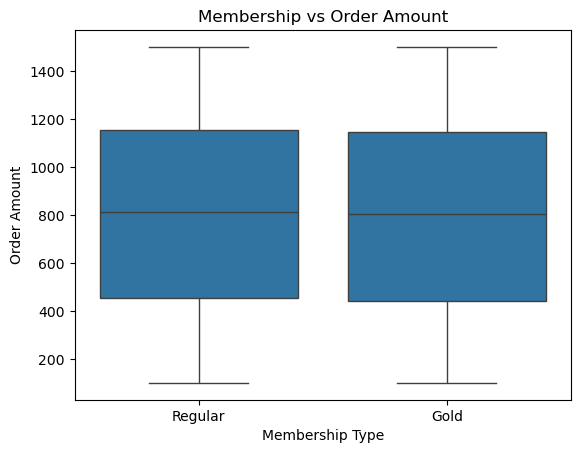

In [36]:
#Membership Impact (Gold vs Regular)
#Membership Impact on Revenue
sns.boxplot(
    data=final_df,
    x='membership',
    y='total_amount'
)

plt.title("Membership vs Order Amount")
plt.xlabel("Membership Type")
plt.ylabel("Order Amount")
plt.show()

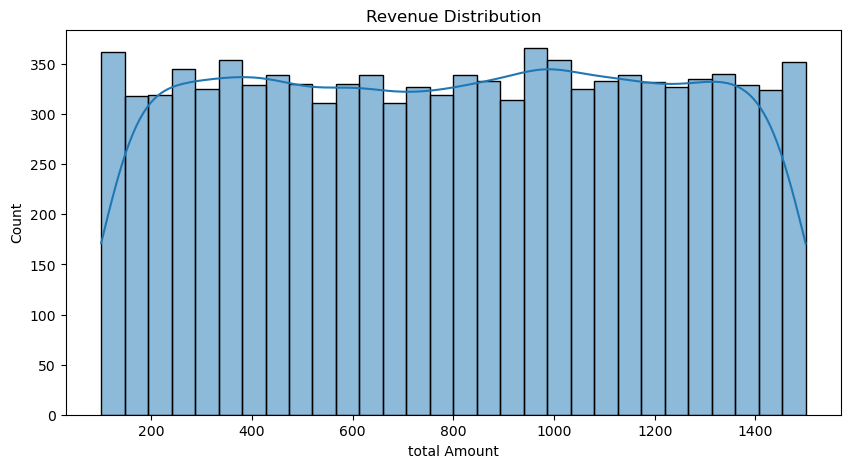

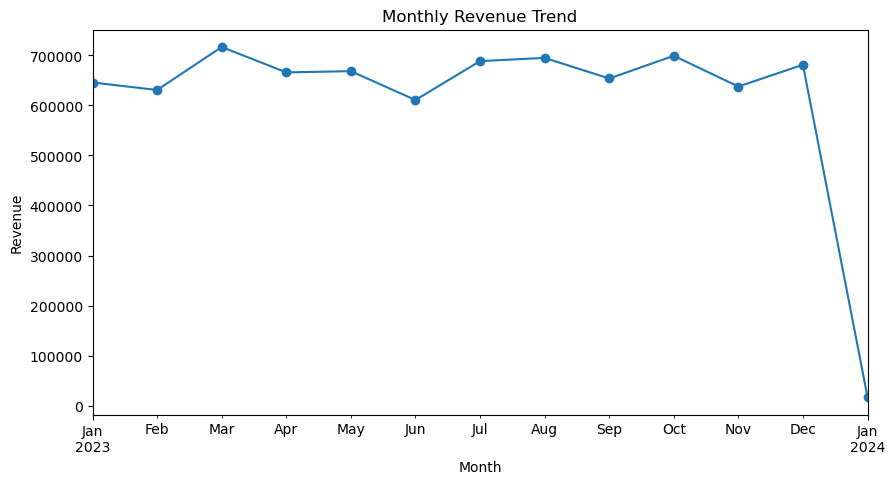

In [35]:
#Revenue Distribution and Seasonality
plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('total Amount')
plt.show()

revenue_over_month = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()
revenue_over_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()